In [34]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras
from tensorflow.keras import backend as k
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import os
import glob
import numpy as np
import json

In [19]:
def get_datagen():    
    datagen = ImageDataGenerator(
        #rescale=1./255,
        rotation_range=16,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        shear_range=0.2,
        zoom_range=0.1
    )
    test_datagen = ImageDataGenerator(
        #rescale=1./255,
    )
    return datagen,test_datagen

In [20]:
def get_data(train_datagen,test_datagen):
    train_it = train_datagen.flow_from_directory('data/train/', class_mode='categorical',target_size=(224, 224))

    test_it = test_datagen.flow_from_directory('data/test/', class_mode='categorical',target_size=(224, 224))
    return train_it,test_it
#test_it = tf.keras.preprocessing.image_dataset_from_directory('data/test/',image_size=(225, 225))
    

In [21]:
datagen,test_datagen=get_datagen()
train_it,test_it=get_data(datagen,test_datagen)

Found 1189 images belonging to 6 classes.
Found 293 images belonging to 6 classes.


In [22]:
def get_vgg():
    vgg19 = tf.keras.applications.vgg19
    vgg = vgg19.VGG19(weights='imagenet',include_top=False,input_shape=(224,224,3))
    print(vgg.summary())
    return vgg

In [23]:
def get_Resnet():
    from tensorflow.keras.applications import ResNet50
    vgg = ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3),pooling='avg')
    for i in range(0,len(vgg.layers)-20):
        vgg.layers[i].trainable = False
    vgg.summary()
    return vgg

In [24]:
def get_model(vgg):    
    x = tf.keras.layers.Flatten()(vgg.output)
    # three hidden layers
    x = tf.keras.layers.Dense(256, activation='selu')(x)
    x = tf.keras.layers.Dropout(0.1)(x)
    # final softmax layer with two categories (dog and cat)
    predictions = tf.keras.layers.Dense(6, activation='softmax')(x)
    model = tf.keras.Model(inputs=vgg.input,outputs=predictions)
    model.summary()
    return model

In [25]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


In [45]:
def train(ep):
    model = get_Resnet()
    model=get_model(model)
    model.compile(loss='categorical_crossentropy',
                      optimizer=tf.keras.optimizers.Adamax(),
                      metrics=['acc'])
    history = model.fit(train_it, epochs = ep,steps_per_epoch=16, validation_data=test_it, validation_steps=8)
    return model,history

In [ ]:
def save_model(model)
    model_json = model.to_json()
    with open("model.json", "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model.save_weights("model.h5")

In [49]:
def get_model():
    #Reading the model from JSON file
    with open('model.json', 'r') as json_file:
        json_savedModel= json_file.read()

    
    model = tf.keras.models.model_from_json(json_savedModel)
    model.load_weights('model.h5')
    return model

In [132]:
model,history = train(25)

Epoch 1/25
16/16 [==============================] - 65s 4s/step - loss: 2.0797 - acc: 0.5391 - val_loss: 5.2252 - val_acc: 0.5977
Epoch 2/25
16/16 [==============================] - 65s 4s/step - loss: 0.6437 - acc: 0.7988 - val_loss: 2.5971 - val_acc: 0.6641
Epoch 3/25
16/16 [==============================] - 64s 4s/step - loss: 0.4583 - acc: 0.8330 - val_loss: 2.7772 - val_acc: 0.5977
Epoch 4/25
16/16 [==============================] - 63s 4s/step - loss: 0.3302 - acc: 0.8763 - val_loss: 1.3422 - val_acc: 0.7383
Epoch 5/25
16/16 [==============================] - 67s 4s/step - loss: 0.2467 - acc: 0.9180 - val_loss: 1.0585 - val_acc: 0.7695
Epoch 6/25
16/16 [==============================] - 74s 5s/step - loss: 0.1816 - acc: 0.9395 - val_loss: 0.7692 - val_acc: 0.8164
Epoch 7/25
16/16 [==============================] - 74s 5s/step - loss: 0.2210 - acc: 0.9381 - val_loss: 0.7318 - val_acc: 0.8242
Epoch 8/25
16/16 [==============================] - 78s 5s/step - loss: 0.1782 - acc: 0.94

In [ ]:
save_model(model)

In [50]:
model=get_model()

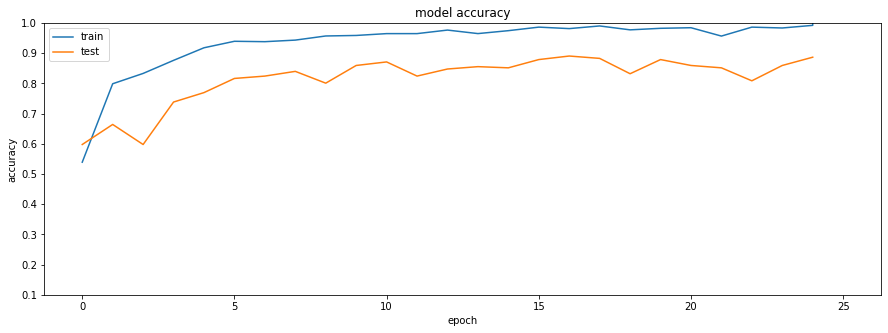

In [180]:
def plot(history)
    plt.figure(figsize=(15,5))
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.ylim(0.1,1)
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

Treadmill 0.99371123
Treadmill 0.99994946
Treadmill 0.99936515
Treadmill 0.999987
Treadmill 0.8974826
Treadmill 0.9987915
Treadmill 0.99998426
Treadmill 0.9997342
Treadmill 0.99998224
Treadmill 0.99999857
Treadmill 0.9992423
Treadmill 0.99999976
Treadmill 0.65417904
Treadmill 0.9999995
Treadmill 0.794496
Rowing 0.81944674
Treadmill 0.99988055
Treadmill 0.99999607
Treadmill 0.9999993
Treadmill 0.99795234
Treadmill 1.0
Treadmill 0.99994123
Treadmill 0.99999976
Treadmill 0.98511803
Treadmill 0.99999666
Treadmill 0.9983569
Treadmill 0.9998597
Treadmill 0.9997758
Treadmill 0.9986085
Treadmill 0.9999974
Treadmill 0.9998964
Treadmill 0.9518982
Treadmill 0.99999917
Treadmill 0.9999999
Treadmill 0.99805284
Rowing 0.79218
Treadmill 0.9999993
Treadmill 0.99368405
Rowing 0.7149901
Treadmill 0.9994997
Treadmill 0.99999
Treadmill 0.99974984
Treadmill 0.9999881
Rowing 0.8993364
Treadmill 0.9994604
Treadmill 0.99939907
Treadmill 0.99999475
Treadmill 0.9994254
Treadmill 0.99998593
Treadmill 0.99988806


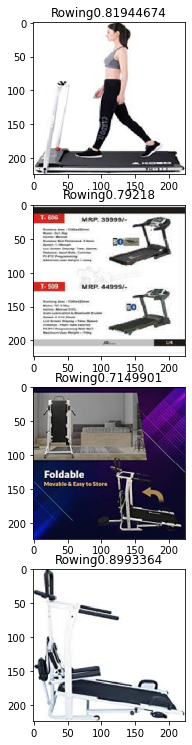

In [111]:
names = ['Bench Press','Bicycle','Leg Press','Pec Deck','Rowing','Treadmill']
y_preds = []
y_real = []
counter=1
fig = plt.figure(figsize=(100,100))
for filename in glob.glob('data/test/treadmill/*.jpg'):
    #im = Image.open(filename)
    img = image.load_img(filename, target_size=(224, 224))
    img_array = image.img_to_array(img)
    y_real.append(5)
    img_batch = np.expand_dims(img_array, axis=0)
    arr = model.predict(img_batch)
    maxi = 0
    cur=-1
    for i in range (0,6):
        if(arr[0][i]>maxi):
            maxi = arr[0][i]
            cur=i
    y_preds.append(cur)
    print(names[cur]+' '+str(maxi))
    if(names[cur]!='Treadmill'):
        fig.add_subplot(30,1,counter)
        counter=counter+1
        plt.imshow(img)
        plt.title(names[cur]+str(maxi))

print(counter-1)

In [121]:
from sklearn.metrics import confusion_matrix

In [100]:
preds = model.predict(test_it)

In [147]:
test_fin_datagen = ImageDataGenerator(
)
test_it_fin = test_fin_datagen.flow_from_directory('data/test/',shuffle=False, class_mode='categorical',target_size=(224, 224),batch_size=1)
y_preds = model.predict(test_it_fin)

Found 293 images belonging to 6 classes.


In [152]:
y_real = test_it_fin.classes
y_real

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5], dtype=int32)

In [149]:
y_preds = np.argmax(y_preds,axis=1)

In [150]:
y_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0,
       3, 0, 0, 1, 1, 1, 1, 1, 4, 5, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 4, 2, 2, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 3, 4, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 5, 4, 4, 2, 4, 4, 4, 2, 4, 4, 4, 4, 1, 4, 4, 4,
       1, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 0, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5])

In [153]:
confusion_matrix(y_real, y_preds)

array([[39,  0,  2,  5,  0,  1],
       [ 2, 51,  0,  0,  2,  2],
       [ 1,  1, 33,  1,  3,  1],
       [ 1,  0,  0, 53,  1,  1],
       [ 2,  3,  2,  0, 34,  1],
       [ 0,  1,  0,  0,  0, 50]])

<AxesSubplot:>

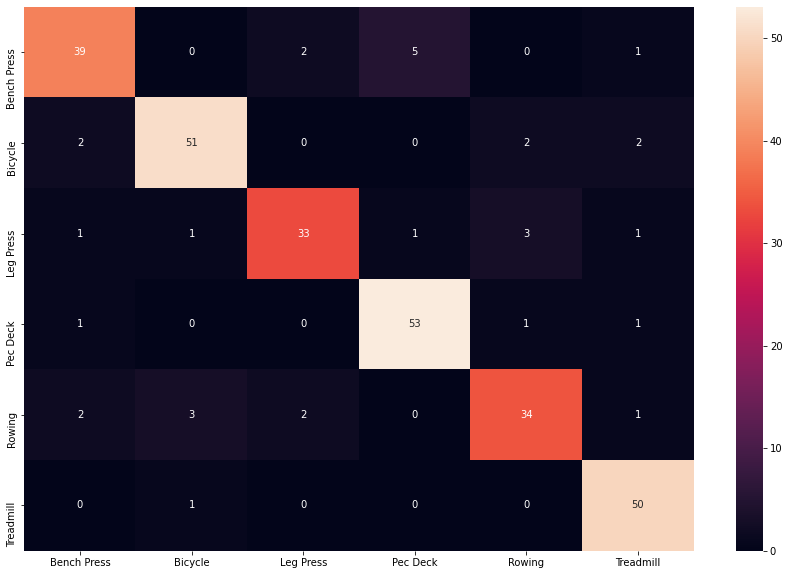

In [154]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cm = confusion_matrix(y_real, y_preds)
df_cm = pd.DataFrame(cm, index = [i for i in names],
                  columns = [i for i in names])
plt.figure(figsize = (15,10))
sn.heatmap(df_cm, annot=True)

In [155]:
np.sum(y_real==y_preds)

260